In [2]:
import numpy as np
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
np.random.seed(333)

In [4]:
random_1 = np.random.randn(2,100)

In [5]:
random_1.shape

(2, 100)

In [6]:
random_2 = np.random.randn(2,100) + 2

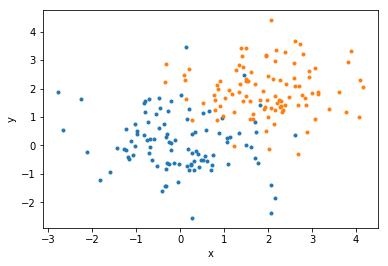

In [10]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.xlabel('x')
pl.ylabel('y');

# 1. chose the number of clusters 
nclusters = 2

In [14]:
random_stack = np.hstack([random_1, random_2])

# 2. set a guess for the initial centers

In [79]:
# fix the centers to a poor initial guess
centers = np.array([[0.,-1.], [0,-2]]) 

# a better initial guess would have been
#minval, maxval = min(random_stack[0]), max(random_stack[0])
#np.array((np.random.rand(4)   * (maxval - minval)) + minval).reshape(2,2)

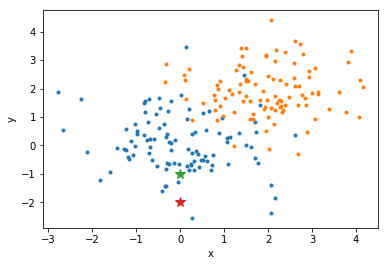

In [80]:
pl.plot(random_1[0], random_1[1], '.')
pl.plot(random_2[0], random_2[1], '.')
pl.plot(centers[0,0], centers[0,1], '*', ms=10)
pl.plot(centers[1,0], centers[1,1], '*', ms=10)
pl.xlabel('x')
pl.ylabel('y');

In [81]:
#define the distance metric - just Eucledian distance
def distmetric(x, y, center):
    distmetric = np.sqrt( (x - center[0])**2 + (y - center[1])**2)
    return distmetric

# 3. check for each point which center is closer

In [82]:
cl1 = distmetric(random_1[0], random_1[1], centers[0]) < distmetric(random_1[0], random_1[1], centers[1])
cl2 = distmetric(random_2[0], random_2[1], centers[0]) < distmetric(random_2[0], random_2[1], centers[1])

cl1

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

# 4. calculate new centers

In [83]:
newc = np.array(
    [np.hstack([random_1[:, cl1], random_2[:, cl2]]).mean(axis=1), 
        np.hstack([random_1[:, ~cl1], random_2[:, ~cl2]]).mean(axis=1)])
print ("old center\n", centers, "\nnew center\n", newc)

old center
 [[ 0. -1.]
 [ 0. -2.]] 
new center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]]


# 5. iterate 3&4 till convergence

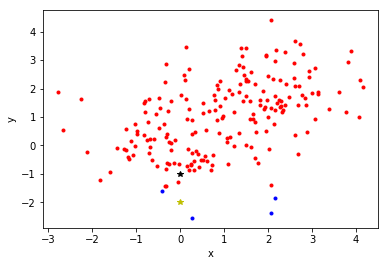

iteration 0


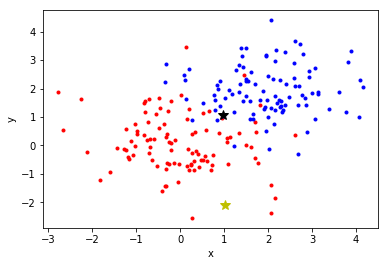

old center
 [[ 0.96972306  1.06522176]
 [ 1.02400655 -2.10176012]] 
new center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]]
iteration 0


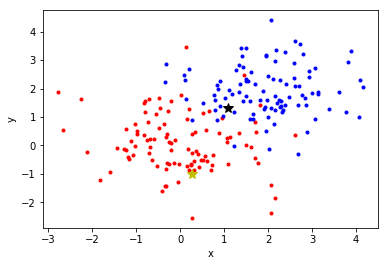

old center
 [[ 1.0864584   1.33128024]
 [ 0.26038932 -1.02156344]] 
new center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]]
iteration 0


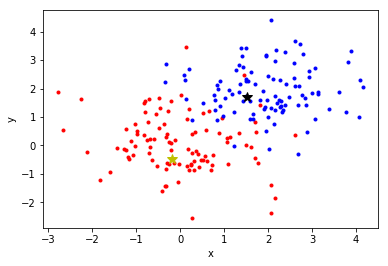

old center
 [[ 1.51743939  1.69021039]
 [-0.19078144 -0.46081543]] 
new center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]]
iteration 0


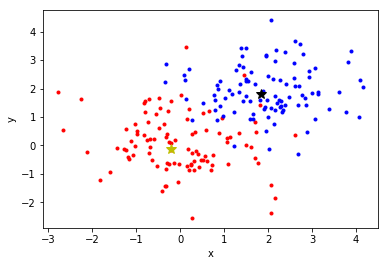

old center
 [[ 1.8303943   1.81924948]
 [-0.21623802 -0.12686326]] 
new center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]]
iteration 0


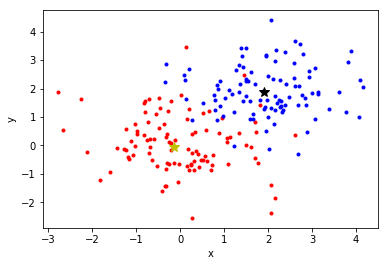

old center
 [[ 1.90521904  1.88827286]
 [-0.14843    -0.05983864]] 
new center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]]
iteration 0


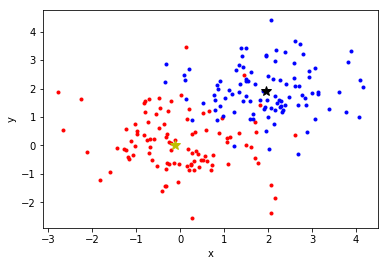

old center
 [[  1.96325332e+00   1.90823820e+00]
 [ -1.26103718e-01   1.20148998e-04]] 
new center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]]
iteration 0


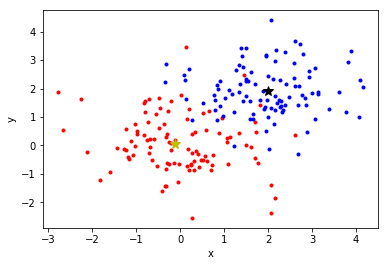

old center
 [[ 2.00484901  1.92635603]
 [-0.10543728  0.03967459]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]
iteration 0


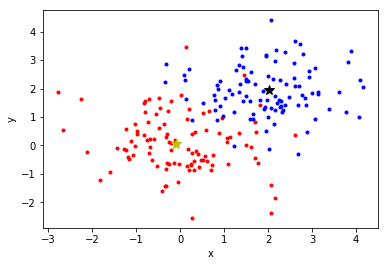

old center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]] 
new center
 [[ 2.01522567  1.93589473]
 [-0.09470755  0.04900058]]


In [84]:
[your code here...]